# Alumna: Hernández Sandoval Kelly Pamela

## Ejercicio 3: Ecuación logística

Para el estudio de crecimiento de poblaciones, limitadas por comida se tiene u nmodelo matemático conocido como la ecuación logística

$$\frac{dy(t)}{dt}=\lambda y(1-y),     para 0<t<T_{max}$$

$$y(0)=y_0$$

Siendo $y(0)$ la condición inicial

Donde $y_0$ es la población inicial, $\lambda>0$ y $T_{max})h_t * N_t$. Obsérvese que en este caso la ecuación es no lineal, pues del lado derecho aparece un término con $y^2. La solución exacta es:

$$y(t)=\frac{y_0}{y_0+(1-y_0)e^{-\lambda t}}$$

* Aproximar el crecimiento de la población usando el método forward Euler. (a) Escribir la fórmula del método para este caso e implementarl en python, (b) reproducir la gráfica que se muestra en la siguiente lámina para $ \lambda=10$, $y_0=0.001$ y $N_t=4, 16, 64$

(a)  Forward Euler

$y_{n+1}= y_n -h_t f(t_n,y_n)$

$y_{n+1}= y_n +h_t(\lambda_n(1-y_n))$

$y_{n+1}= y_n +h_t y_n\lambda-h_t y_n$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def mesh(a, b, Nt):
    """
    Función que calcula ht, el tamaño del paso de tiempo

    Parameters
    ----------
    a : inicio del dominio, t inicial
    b : fin del dominio, t final
    Nt : pasos de tiempo

    Returns
    -------
    ht : Tamaño del paso de tiempo

    """
    
    ht = (b-a)/Nt
    return ht

def exactSolution(t, y0, lam):
    """
    Función que calcula la función exacta, la función analítica

    Parameters
    ----------
    t : tiempo
    y0 : condición inicial, es la capacidad de presistencia
    lam : constante lambda define la tasa de crecimiento

    Returns
    -------
         Función analítica
    """
    return (y0)/(y0 + (1-y0)*np.exp(-lam*t))

def forwardEuler(y, ht, lam):
    """
    Función que implementa la aproximación por medio de Forward Euler

    Parameters
    ----------
    y : aproximación a la solución del problema
    ht : tamaño del paso de tiempo
    lam : constante lambda define la tasa de crecimiento

    Returns
    -------
    y : aproximación a la solución del problema


    Es complicado calcular A, por lo que se implementa la aproximación directamente en el ciclo for
    """        
    for i, val in enumerate(y[0:-1]):
        y[i +1] = y[i]+ht*(lam*y[i]*(1-y[i]))
        
       # An.append(An[i] * A)
    return y


In [10]:
#Pasos de tiempo para cada caso
Nt = 4  
Nt2 = 16
Nt3 = 64
#tiempo máximo
Tmax=1

y0 = 0.01 #condición inicial
lam = 10 #tasa de crecimiento

#PARA Nt=4
#se llama la función para el tamaño del paso de tiempo
ht = mesh(0, Tmax , Nt) 

#dominio y paso de tiempo para su respectivo Nt
t = np.linspace(0, Tmax , Nt +1) 

yf = np.zeros(Nt+1) #arreglo para la aproximación por forward euler de tamaño Nt+1

yf[0] = y0 #se asigna el valor inicial 

error_f = forwardEuler(yf, ht , lam )

#se establece el dominio para la graficación de la función analítica
tl = np.linspace(0, Tmax , 100)
y_exacta = exactSolution(tl , y0 , lam )
y_exac_p = exactSolution(t, y0 , lam)

#se calcula el error
norma_error_f = np.linalg.norm(yf - y_exac_p,2)

#---------A continuación se realizan los pasos anteriores para cada caso, con Nt correspondiente

#Para Nt=16

ht2 = mesh(0, Tmax , Nt2)
#dominio y paso de tiempo para su respectivo Nt

t2 = np.linspace(0, Tmax , Nt2+1)
yf2 = np.zeros(Nt2+1)

yf2[0] = y0
error_f2 = forwardEuler(yf2, ht2 , lam )


tl2 = np.linspace(0, Tmax , 100)
y_exacta2 = exactSolution(tl2 , y0 , lam )
y_exac_p2 = exactSolution(t2, y0 , lam)


norma_error_f2 = np.linalg.norm(yf2 - y_exac_p2,2)

#Para Nt=64

ht3 = mesh(0, Tmax , Nt3)
#dominio y paso de tiempo para su respectivo Nt

t3 = np.linspace(0, Tmax , Nt3+1)
yf3 = np.zeros(Nt3+1)

yf3[0] = y0
error_f3 = forwardEuler(yf3, ht3 , lam )


tl3 = np.linspace(0, Tmax , 100)
y_exacta3 = exactSolution(tl3 , y0 , lam )
y_exac_p3= exactSolution(t3, y0 , lam)


norma_error_f3 = np.linalg.norm(yf3 - y_exac_p3,2)

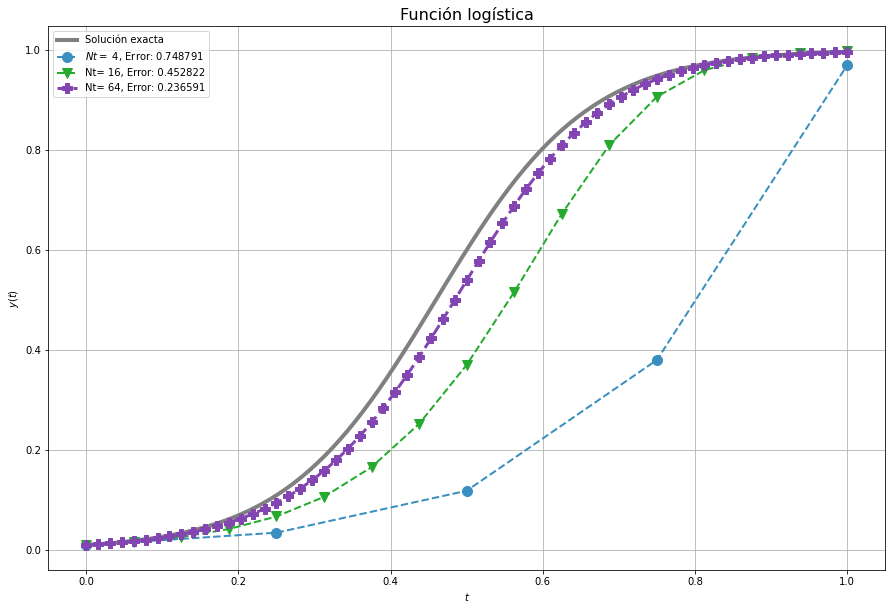

In [11]:
#Gráfica 

plt.figure(figsize=(15,10)) #se establece el tamaño de la figura
plt.plot(tl,y_exacta, 'gray',label='Solución exacta', linewidth=4)
plt.plot(t,yf, 'b--o',color='#398FC0',label='$Nt=$ {}, Error: {:5f}'.format(Nt,norma_error_f), linewidth=2,markersize=10)
plt.plot(t2,yf2,'--v',color='#24AA2C',label='Nt= {}, Error: {:5f}'.format(Nt2,norma_error_f2),linewidth=2,markersize=10)
plt.plot(t3,yf3,'--P', color='#8245B2',label='Nt= {}, Error: {:5f}'.format(Nt3,norma_error_f3),linewidth=3,markersize=10)
plt.legend()
plt.title('Función logística',fontsize=16)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.grid()
plt.show()

